In [1]:
#from utils.sqlfunctions import make_connection, load_df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap


In [153]:
! pip3 install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Using cached pyproj-3.0.0.post1-cp38-cp38-macosx_10_9_x86_64.whl (7.4 MB)
  Using cached pyshp-2.1.3-py3-none-any.whl
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
Using legacy 'setup.py install' for basemap, since package 'wheel' is not installed.
    Running setup.py install for basemap ... done
You should consider upgrading via the '/Users/esther/Documents/bike-sharing/venv/bin/python -m pip install --upgrade pip' command.


In [268]:
features_df = pd.read_csv("../data/features.csv")
df = pd.read_csv("../data/hubway_trips.csv")
weather_df = pd.read_csv("../data/weather.csv")

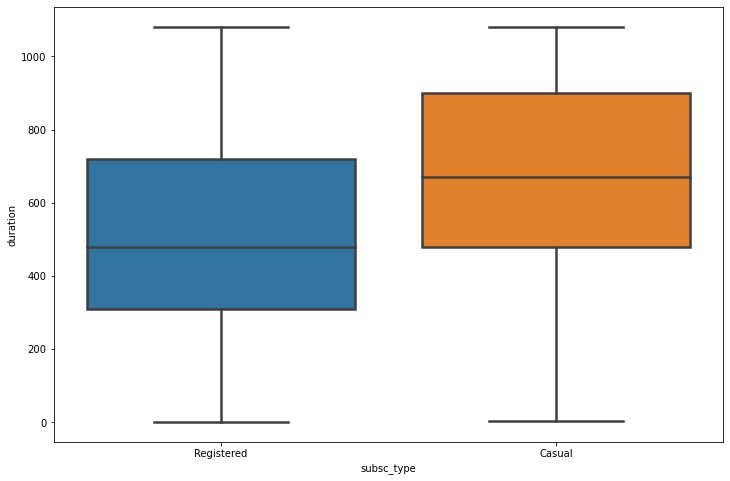

In [239]:
df = df[(df['duration'] < df['duration'].quantile(0.75)) & (df['duration'] > 0)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
ax = sns.boxplot(x="subsc_type", y="duration",
                 data=df, linewidth=2.5)

In [215]:
in_flow = features_df.groupby(['strt_statn', 'start_month', 'start_lng', 'start_lat'])\
.size()\
.reset_index(name='in_flow_count')\
.rename(columns={'strt_statn':'station_id',
                 'start_year':'year',
                 'start_month':'month',
                 'start_lng':'lng',
                 'start_lat':'lat'})
out_flow = features_df.groupby(['end_statn', 'end_month','end_lng', 'end_lat'])\
.size()\
.reset_index(name='out_flow_count')\
.rename(columns={'end_statn':'station_id',
                 'end_year':'year',
                 'end_month':'month',
                 'end_lng':'lng',
                 'end_lat':'lat'})

In [216]:
flow = pd.merge(in_flow, out_flow, on=['station_id','month','lat','lng'], how="inner")
flow['flow_count'] = flow['in_flow_count'] + flow['out_flow_count']

[Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '36'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '44'),
 Text(0, 0, '45'),
 Text(0, 0, '46'),
 Text(0, 0, '47'),
 Text(0, 0, '48'),
 Text(0, 0, '49'),
 Text(0, 0, '50'),
 Text(0, 0, '51'),
 Text(0, 0, '52'),
 Text(0, 0, '53'),
 Text(0, 0, '54'),
 Text(0, 0, '55'),
 Text(0, 0, '56'),


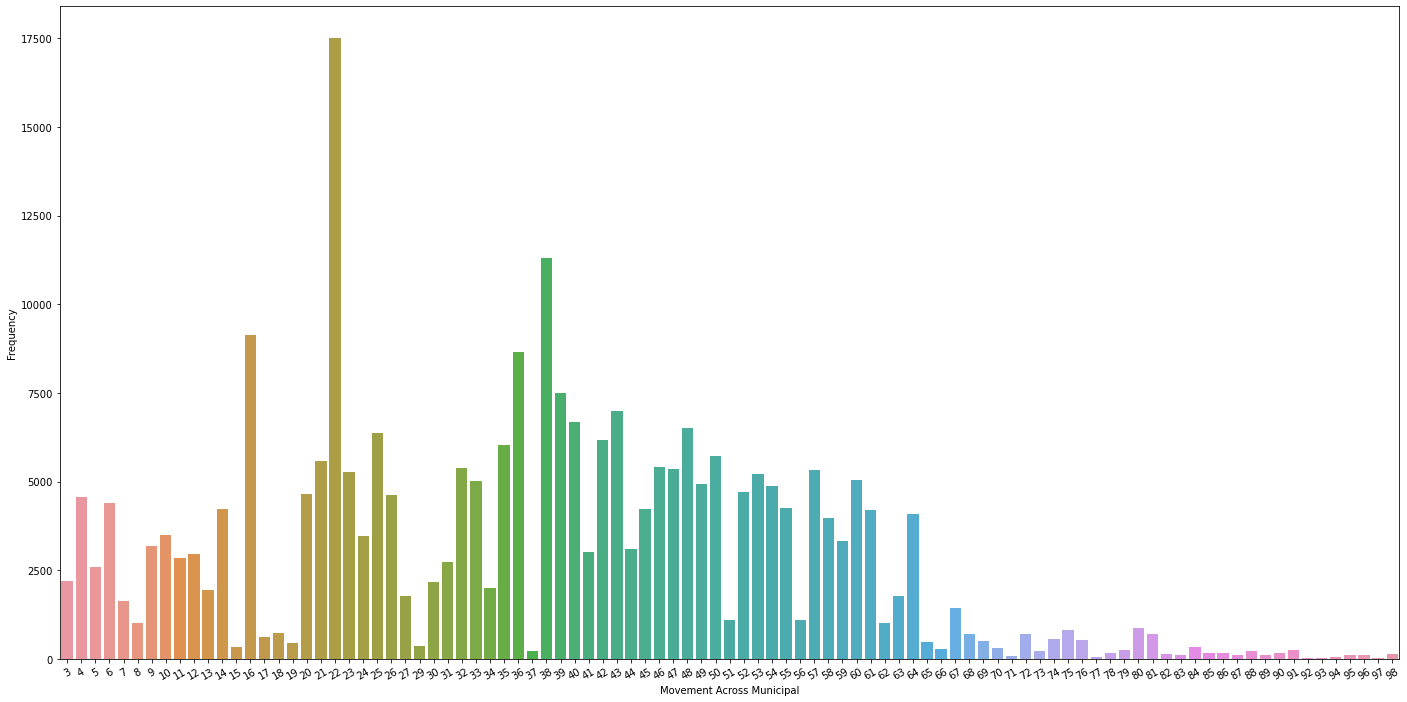

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(24,12))
cp = sns.countplot(x="strt_statn", data=features_df)
cp.set(xlabel="Movement Across Municipal", ylabel = "Frequency")
cp.set_xticklabels(cp.get_xticklabels(), rotation=30)

In [14]:
flow.sort_values(by=['flow_count'], ascending=False)

,station_id,month,lng,lat,in_flow_count,out_flow_count,flow_count
169,22,8,-71.055547,42.352175,3563,3473,7036
170,22,9,-71.055547,42.352175,3319,3391,6710
168,22,7,-71.055547,42.352175,2390,2394,4784
304,38,9,-71.060868,42.366231,2135,2374,4509
303,38,8,-71.060868,42.366231,2156,2259,4415
...,...,...,...,...,...,...,...
565,75,7,-71.100420,42.363562,4,8,12
568,76,7,-71.105495,42.366426,6,6,12
562,74,7,-71.118579,42.373268,3,5,8
547,68,7,-71.103100,42.365070,3,3,6


In [18]:
def plot_stations_map(ax, stns, noText=False):
    # determine range to print based on min, max lat and lon of the data
    lat = list(stns['lat'])
    lon = list(stns['lng'])
    siz = [(2)**(x/1000) for x in stns['flow_count']]
    margin = 0.01 # buffer to add to the range
    lat_min = min(lat) - margin
    lat_max = max(lat) + margin
    lon_min = min(lon) - margin
    lon_max = max(lon) + margin

    # create map using BASEMAP
    m = Basemap(llcrnrlon=lon_min,
                llcrnrlat=lat_min,
                urcrnrlon=lon_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(lon_max - lon_min)/2,
                projection='lcc',
                resolution = 'f',)

    m.drawcoastlines()
    m.fillcontinents(lake_color='aqua')
    m.drawmapboundary(fill_color='aqua')
    m.drawrivers()

    # convert lat and lon to map projection coordinates
    lons, lats = m(lon, lat)

    # plot points as red dots
    if noText:
        ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6, s=2)
        return
    else:
        ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.3, s=siz)
    
    # annotate popular stations
    for i in range(len(siz)):
        if siz[i] >= 2**6:
            plt.text(lons[i], lats[i], text[i])

NameError: name 'text' is not defined

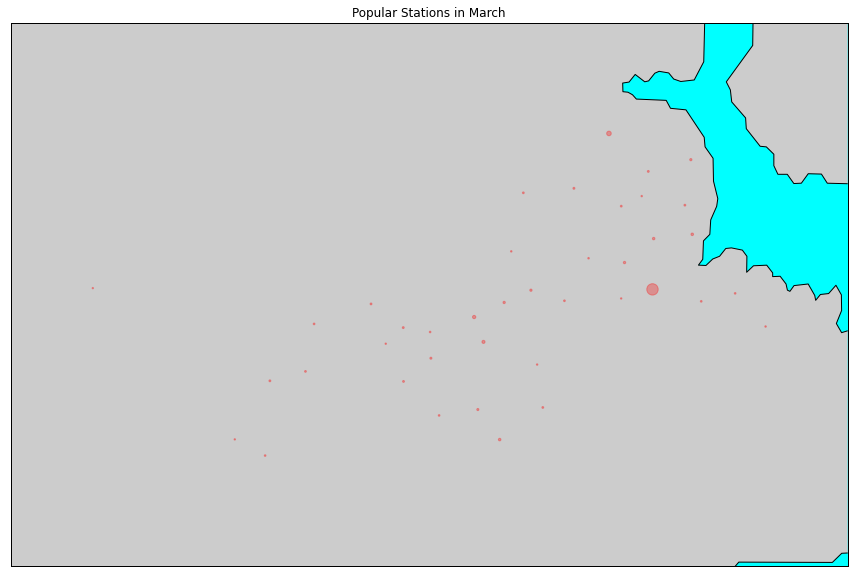

In [19]:
pop_flow = flow[flow['flow_count'] > 1000]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
# ax = plt.subplot(1, 1, 1)
# ax.set_title("All Stations")
# plot_stations_map(ax, flow, noText=True)

ax = plt.subplot(1, 1, 1)
ax.set_title("Popular Stations")
plot_stations_map(ax, pop_flow[pop_flow['month'] == 8])
# ax = plt.subplot(1, 4, 3)
# ax.set_title("Popular Stations in June")
# plot_stations_map(ax, pop_flow[pop_flow['month'] == 6])
# ax = plt.subplot(1, 4, 4)
# ax.set_title("Popular Stations in September")
# plot_stations_map(ax, pop_flow[pop_flow['month'] == 9])

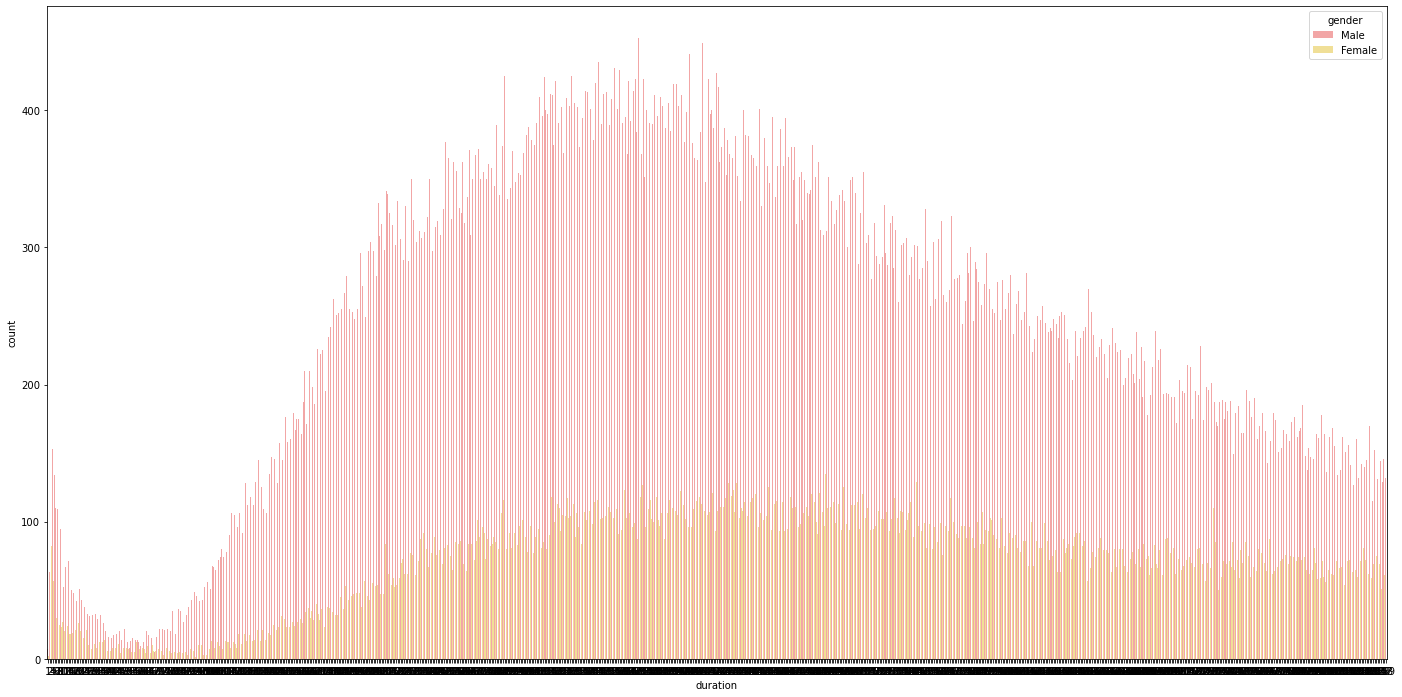

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(24,12))
cp = sns.countplot(x="duration", hue="gender", data=features_df, 
                   palette={"Male": "#FF9999", "Female": "#FFE888"})

[Text(0, 0, 'Boston-Boston'),
 Text(0, 0, 'Cambridge-Cambridge'),
 Text(0, 0, 'Cambridge-Boston'),
 Text(0, 0, 'Boston-Cambridge'),
 Text(0, 0, 'Somerville-Somerville'),
 Text(0, 0, 'Somerville-Cambridge'),
 Text(0, 0, 'Brookline-Boston'),
 Text(0, 0, 'Boston-Brookline'),
 Text(0, 0, 'Cambridge-Somerville'),
 Text(0, 0, 'Brookline-Brookline'),
 Text(0, 0, 'Somerville-Boston'),
 Text(0, 0, 'Boston-Somerville'),
 Text(0, 0, 'Brookline-Cambridge'),
 Text(0, 0, 'Cambridge-Brookline')]

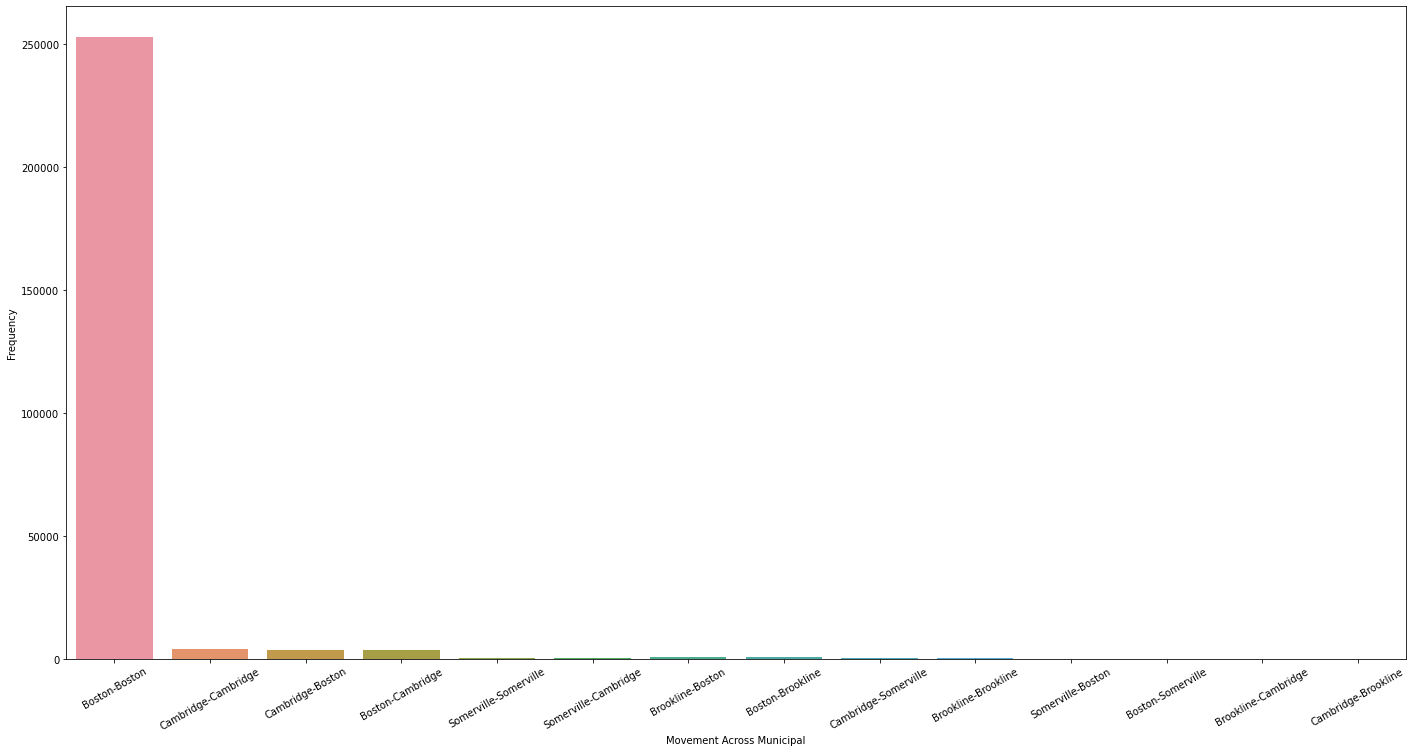

In [92]:
features_df['movement'] = features_df['start_municipal'] + '-' + features_df['end_municipal']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(24,12))
cp = sns.countplot(x="movement", data=features_df)
cp.set(xlabel="Movement Across Municipal", ylabel = "Frequency")
cp.set_xticklabels(cp.get_xticklabels(), rotation=30)

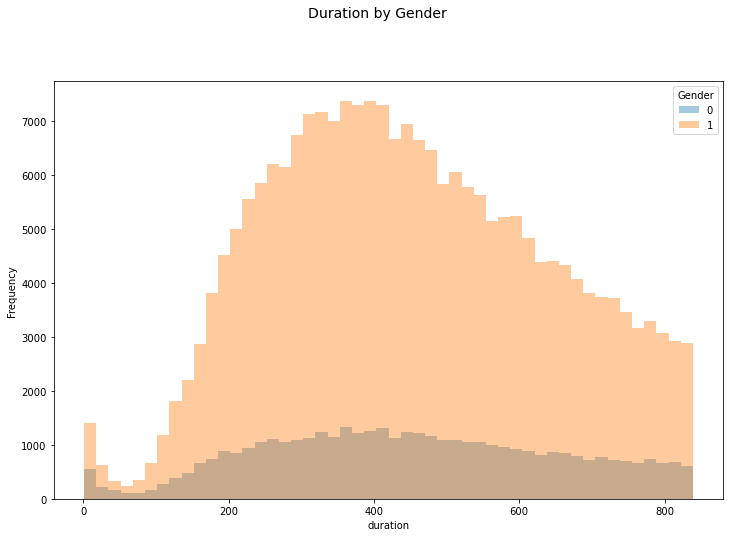

In [58]:
fig = plt.figure(figsize = (12, 8))
title = fig.suptitle("Duration by Gender", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Duration")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(features_df, hue='is_start_working_day')
g.map(sns.distplot, 'duration', kde=False, bins=50, ax=ax)
ax.legend(title='Gender')
plt.close(2)

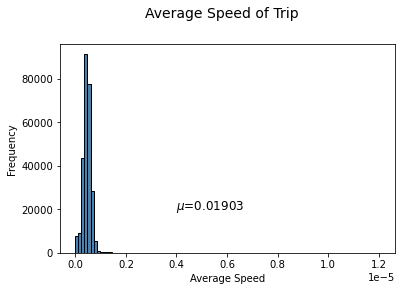

In [235]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Average Speed of Trip", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Average Speed")
ax.set_ylabel("Frequency") 
ax.text(0.000004, 20000, r'$\mu$='+str(round(features_df['start_hpcp'].mean(),5)), fontsize=12)
freq, bins, patches = ax.hist(features_df['average_speed'], color='steelblue', bins=100, edgecolor='black', linewidth=1)

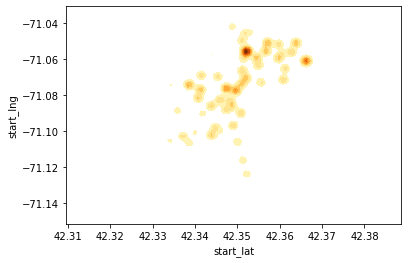

In [98]:
ax = sns.kdeplot(features_df['start_lat'], features_df['start_lng'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)

/Users/esther/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


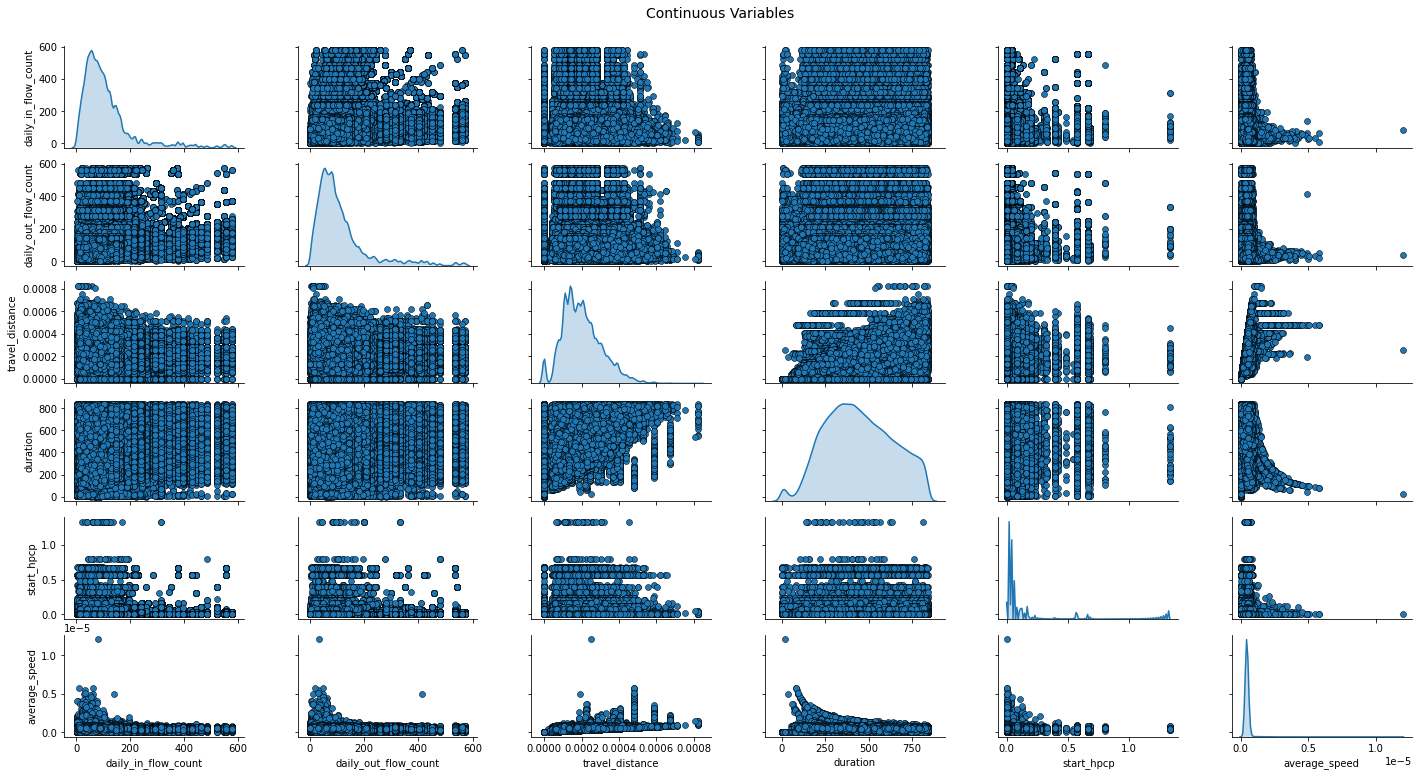

In [202]:
cols = ['daily_in_flow_count', 'daily_out_flow_count', 'travel_distance', 'duration', 'start_hpcp', 'average_speed']
pp = sns.pairplot(features_df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Continuous Variables', fontsize=14)

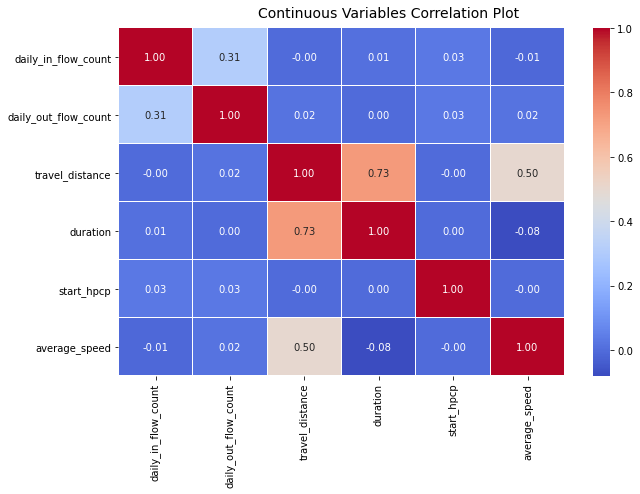

In [203]:
f, ax = plt.subplots(figsize=(10, 6))
corr = features_df[cols].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Continuous Variables Correlation Plot', fontsize=14)

In [273]:
import pickle
model = pickle.load(open('../models/output/rf_Registered.sav', 'rb'))

In [269]:
features = ['travel_distance', 'start_hpcp', 'end_hpcp', 'daily_in_flow_count', 'daily_out_flow_count', 'is_start_holiday', 'is_start_Boston', 'is_start_Brookline', 'is_start_Cambridge', 'is_start_Somerville', 'is_end_Boston', 'is_end_Brookline', 'is_end_Cambridge', 'is_end_Somerville', 'is_Female', 'is_Male', 'is_start_0', 'is_start_1', 'is_start_2', 'is_start_3', 'is_start_5', 'is_start_6', 'is_start_7', 'is_start_8', 'is_start_10', 'is_start_11', 'is_start_12', 'is_start_13', 'is_start_14', 'is_start_15', 'is_start_16', 'is_start_18', 'is_start_19', 'is_start_20', 'is_start_21', 'is_start_22', 'is_start_23', 'is_end_0', 'is_end_1', 'is_end_2', 'is_end_3', 'is_end_4', 'is_end_5', 'is_end_6', 'is_end_7', 'is_end_8', 'is_end_9', 'is_end_10', 'is_end_11', 'is_end_12', 'is_end_13', 'is_end_14', 'is_end_15', 'is_end_16', 'is_end_17', 'is_end_18', 'is_end_19', 'is_end_20', 'is_end_21', 'is_end_22', 'is_end_23', 'is_start_11Q3', 'is_start_12Q1', 'is_young', 'is_station_diff']

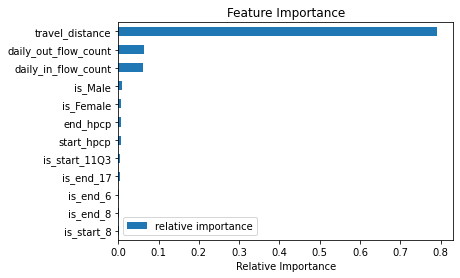

In [274]:
n = 12
plot_df = pd.DataFrame()


plot_df['relative importance'] = model.feature_importances_[model.feature_importances_.argsort()[::-1][:n]]

features_order = []
for idx in model.feature_importances_.argsort()[::-1][:n].tolist():
    features_order.append(features[idx])
    
plot_df.index = features_order
plot_df.sort_values(by = 'relative importance', inplace = True)


plot_df.plot.barh(title = 'Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

Text(0, 0.5, 'Predicted')

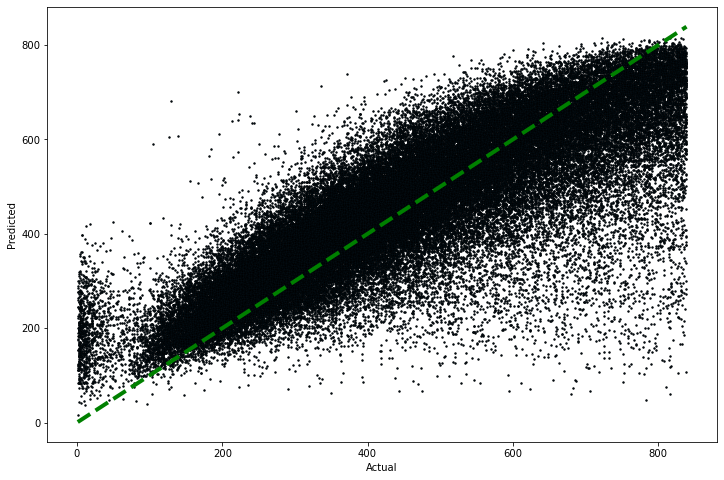

In [275]:
import json
file_path = "../models/output/rf_Registered.json"
with open(file_path) as iFile:
    results = json.load(iFile)
    
y_pred = []
y_true = []
for idx, value in enumerate(results['y_pred_test']):
    if value >= 0:
        y_pred.append(value)
        y_true.append(results['y_test'][idx])
        
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(y_true, y_pred, edgecolors=(0, 0, 0), s=2)
ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'k--', lw=4, c='g')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')